In [91]:
from pathlib import Path
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from matplotlib import pyplot
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, plot_importance


In [3]:
 p = Path.home() / 'AppData' / 'Local' / 'Packages' / \
...     'PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0' / \
...     'LocalCache' / 'local-packages' / 'Python39' / 'Scripts' / 'sample_train_numerai.csv'

train = pd.read_csv(p)

In [6]:
train.head(10)

,era,data_type,feature_shaded_hallucinatory_dactylology,feature_itinerant_hexahedral_photoengraver,feature_prudent_pileate_oven,feature_subalpine_apothegmatical_ajax,feature_pistachio_atypical_malison,feature_symmetrical_spongy_tricentenary,feature_ungrounded_transpontine_winder,feature_aseptic_eely_hemiplegia,...,target_teager2b_20,target_teager2b_60,target_tyler_20,target_tyler_60,target_victor_20,target_victor_60,target_waldo_20,target_waldo_60,target_xerxes_20,target_xerxes_60
0,1,train,3,4,0,3,3,1,1,0,...,0.50,0.50,0.25,0.25,0.25,0.25,0.25,0.00,0.25,0.00
1,1,train,4,2,4,4,0,0,4,4,...,0.50,0.50,0.25,0.25,0.25,0.00,0.25,0.25,0.25,0.25
2,1,train,2,4,0,3,0,3,2,4,...,1.00,1.00,1.00,0.75,0.75,0.75,0.75,1.00,0.75,0.75
3,1,train,2,1,3,0,3,0,3,3,...,0.25,0.25,0.25,0.25,0.50,0.25,0.25,0.25,0.25,0.25
4,1,train,4,1,4,1,0,4,0,4,...,0.50,0.50,0.25,0.50,0.25,0.50,0.25,0.50,0.25,0.50
5,1,train,4,2,2,3,0,4,1,4,...,0.75,0.50,0.75,0.50,0.75,0.50,0.50,0.50,0.75,0.50
6,1,train,1,3,1,2,1,4,1,1,...,0.50,0.50,0.75,0.75,0.50,0.75,0.75,0.75,0.50,0.75
7,1,train,4,4,4,4,0,0,4,2,...,0.75,0.50,0.75,0.50,0.75,0.50,0.50,0.50,0.50,0.50
8,1,train,3,1,3,0,1,1,2,4,...,0.25,0.25,0.50,0.25,0.50,0.00,0.25,0.00,0.00,0.00
9,1,train,0,3,0,3,4,4,1,1,...,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50


In [133]:
y=train["target"]

In [134]:
X=train.drop("target",axis=1)

In [135]:
 np.unique(y,return_counts=True)

(array([0.  , 0.25, 0.5 , 0.75, 1.  ]), array([ 5, 18, 46, 25,  6]))

In [136]:
X=X.drop("era",axis=1)
X=X.drop("data_type",axis=1)

In [137]:
 np.unique(y,return_counts=True)

(array([0.  , 0.25, 0.5 , 0.75, 1.  ]), array([ 5, 18, 46, 25,  6]))

In [138]:
good_cols=[col for col in X.columns if not col.startswith("target")]

In [139]:
X=X[good_cols]

In [14]:
train.head(10)

,era,data_type,feature_shaded_hallucinatory_dactylology,feature_itinerant_hexahedral_photoengraver,feature_prudent_pileate_oven,feature_subalpine_apothegmatical_ajax,feature_pistachio_atypical_malison,feature_symmetrical_spongy_tricentenary,feature_ungrounded_transpontine_winder,feature_aseptic_eely_hemiplegia,...,target_teager2b_20,target_teager2b_60,target_tyler_20,target_tyler_60,target_victor_20,target_victor_60,target_waldo_20,target_waldo_60,target_xerxes_20,target_xerxes_60
0,1,train,3,4,0,3,3,1,1,0,...,0.50,0.50,0.25,0.25,0.25,0.25,0.25,0.00,0.25,0.00
1,1,train,4,2,4,4,0,0,4,4,...,0.50,0.50,0.25,0.25,0.25,0.00,0.25,0.25,0.25,0.25
2,1,train,2,4,0,3,0,3,2,4,...,1.00,1.00,1.00,0.75,0.75,0.75,0.75,1.00,0.75,0.75
3,1,train,2,1,3,0,3,0,3,3,...,0.25,0.25,0.25,0.25,0.50,0.25,0.25,0.25,0.25,0.25
4,1,train,4,1,4,1,0,4,0,4,...,0.50,0.50,0.25,0.50,0.25,0.50,0.25,0.50,0.25,0.50
5,1,train,4,2,2,3,0,4,1,4,...,0.75,0.50,0.75,0.50,0.75,0.50,0.50,0.50,0.75,0.50
6,1,train,1,3,1,2,1,4,1,1,...,0.50,0.50,0.75,0.75,0.50,0.75,0.75,0.75,0.50,0.75
7,1,train,4,4,4,4,0,0,4,2,...,0.75,0.50,0.75,0.50,0.75,0.50,0.50,0.50,0.50,0.50
8,1,train,3,1,3,0,1,1,2,4,...,0.25,0.25,0.50,0.25,0.50,0.00,0.25,0.00,0.00,0.00
9,1,train,0,3,0,3,4,4,1,1,...,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50


In [15]:
X.head()

,feature_shaded_hallucinatory_dactylology,feature_itinerant_hexahedral_photoengraver,feature_prudent_pileate_oven,feature_subalpine_apothegmatical_ajax,feature_pistachio_atypical_malison,feature_symmetrical_spongy_tricentenary,feature_ungrounded_transpontine_winder,feature_aseptic_eely_hemiplegia,feature_elemental_easier_alkalinity,feature_cycloid_zymotic_galloway,...,feature_sprucer_godlier_assembling,feature_venturesome_jesting_characterisation,feature_unstained_anhedonic_hetty,feature_vivisectional_latvian_dispensator,feature_pantheist_interramal_episcopalianism,feature_percurrent_deontic_sectionalisation,feature_myalgic_eulogistic_propagation,feature_pressor_chiropodial_hypertension,feature_diogenic_wooden_lout,feature_pleuritic_equipotent_loudmouth
0,3,4,0,3,3,1,1,0,0,0,...,2,2,2,2,2,2,2,2,2,2
1,4,2,4,4,0,0,4,4,3,0,...,2,2,2,2,2,2,2,2,2,2
2,2,4,0,3,0,3,2,4,2,2,...,2,2,2,2,2,2,2,2,2,2
3,2,1,3,0,3,0,3,3,4,2,...,2,2,2,2,2,2,2,2,2,2
4,4,1,4,1,0,4,0,4,4,0,...,2,2,2,2,2,2,2,2,2,2


In [16]:
y.head()

0    0.25
1    0.25
2    0.75
3    0.25
4    0.25
Name: target, dtype: float64

In [17]:
X=X.reset_index(drop=True)
y=y.reset_index(drop=True)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [19]:
X_train

,feature_shaded_hallucinatory_dactylology,feature_itinerant_hexahedral_photoengraver,feature_prudent_pileate_oven,feature_subalpine_apothegmatical_ajax,feature_pistachio_atypical_malison,feature_symmetrical_spongy_tricentenary,feature_ungrounded_transpontine_winder,feature_aseptic_eely_hemiplegia,feature_elemental_easier_alkalinity,feature_cycloid_zymotic_galloway,...,feature_sprucer_godlier_assembling,feature_venturesome_jesting_characterisation,feature_unstained_anhedonic_hetty,feature_vivisectional_latvian_dispensator,feature_pantheist_interramal_episcopalianism,feature_percurrent_deontic_sectionalisation,feature_myalgic_eulogistic_propagation,feature_pressor_chiropodial_hypertension,feature_diogenic_wooden_lout,feature_pleuritic_equipotent_loudmouth
15,0,4,3,4,2,1,4,2,0,2,...,2,2,2,2,2,2,2,2,2,2
40,4,4,2,4,0,4,4,0,4,0,...,2,2,2,2,2,2,2,2,2,2
96,2,3,3,0,3,0,1,0,2,3,...,2,2,2,2,2,2,2,2,2,2
9,0,3,0,3,4,4,1,1,0,2,...,2,2,2,2,2,2,2,2,2,2
72,2,3,2,3,3,2,0,2,3,1,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,4,1,3,0,4,0,1,1,2,1,...,2,2,2,2,2,2,2,2,2,2
71,0,4,0,1,3,0,1,0,0,0,...,2,2,2,2,2,2,2,2,2,2
14,1,0,1,0,4,0,4,1,2,2,...,2,2,2,2,2,2,2,2,2,2
92,0,3,3,2,4,1,0,2,0,1,...,2,2,2,2,2,2,2,2,2,2


In [20]:
y_test

83    0.75
53    0.75
70    0.75
45    0.75
44    0.50
39    0.50
22    0.50
80    0.50
10    0.25
0     0.25
18    0.75
30    0.25
73    0.50
33    0.25
90    0.50
4     0.25
76    0.50
77    0.50
12    0.50
31    0.75
55    0.25
88    0.75
26    0.75
42    0.50
69    0.50
Name: target, dtype: float64

In [50]:
X_train.head()
y_train.head()
X_test.head()
y_test.head()

83    0.75
53    0.75
70    0.75
45    0.75
44    0.50
Name: target, dtype: float64

In [21]:
X_train.head()


,feature_shaded_hallucinatory_dactylology,feature_itinerant_hexahedral_photoengraver,feature_prudent_pileate_oven,feature_subalpine_apothegmatical_ajax,feature_pistachio_atypical_malison,feature_symmetrical_spongy_tricentenary,feature_ungrounded_transpontine_winder,feature_aseptic_eely_hemiplegia,feature_elemental_easier_alkalinity,feature_cycloid_zymotic_galloway,...,feature_sprucer_godlier_assembling,feature_venturesome_jesting_characterisation,feature_unstained_anhedonic_hetty,feature_vivisectional_latvian_dispensator,feature_pantheist_interramal_episcopalianism,feature_percurrent_deontic_sectionalisation,feature_myalgic_eulogistic_propagation,feature_pressor_chiropodial_hypertension,feature_diogenic_wooden_lout,feature_pleuritic_equipotent_loudmouth
15,0,4,3,4,2,1,4,2,0,2,...,2,2,2,2,2,2,2,2,2,2
40,4,4,2,4,0,4,4,0,4,0,...,2,2,2,2,2,2,2,2,2,2
96,2,3,3,0,3,0,1,0,2,3,...,2,2,2,2,2,2,2,2,2,2
9,0,3,0,3,4,4,1,1,0,2,...,2,2,2,2,2,2,2,2,2,2
72,2,3,2,3,3,2,0,2,3,1,...,2,2,2,2,2,2,2,2,2,2


In [22]:
y_train.head()


15    0.00
40    0.75
96    0.50
9     0.50
72    0.75
Name: target, dtype: float64

In [23]:
X_test.head()

,feature_shaded_hallucinatory_dactylology,feature_itinerant_hexahedral_photoengraver,feature_prudent_pileate_oven,feature_subalpine_apothegmatical_ajax,feature_pistachio_atypical_malison,feature_symmetrical_spongy_tricentenary,feature_ungrounded_transpontine_winder,feature_aseptic_eely_hemiplegia,feature_elemental_easier_alkalinity,feature_cycloid_zymotic_galloway,...,feature_sprucer_godlier_assembling,feature_venturesome_jesting_characterisation,feature_unstained_anhedonic_hetty,feature_vivisectional_latvian_dispensator,feature_pantheist_interramal_episcopalianism,feature_percurrent_deontic_sectionalisation,feature_myalgic_eulogistic_propagation,feature_pressor_chiropodial_hypertension,feature_diogenic_wooden_lout,feature_pleuritic_equipotent_loudmouth
83,0,1,4,1,1,0,4,0,4,4,...,2,2,2,2,2,2,2,2,2,2
53,1,3,1,3,0,1,1,0,3,2,...,2,2,2,2,2,2,2,2,2,2
70,3,2,0,4,3,1,4,0,1,4,...,2,2,2,2,2,2,2,2,2,2
45,1,2,4,1,0,2,3,3,1,3,...,2,2,2,2,2,2,2,2,2,2
44,4,3,0,2,0,1,0,4,3,0,...,2,2,2,2,2,2,2,2,2,2


In [24]:
y_test.head()

83    0.75
53    0.75
70    0.75
45    0.75
44    0.50
Name: target, dtype: float64

In [25]:
model=xgb.XGBRegressor( n_estimators=100)

In [26]:
model.fit(X_train, y_train)
pred = model.predict(X_test)
y_pred=pred
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 0.06992050766898117


In [27]:
model=xgb.XGBRegressor( n_estimators=50)

In [28]:
model.fit(X_train, y_train)
pred = model.predict(X_test)
y_pred=pred
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 0.06992049928129276


In [29]:
model=xgb.XGBRegressor( n_estimators=200)

In [30]:
model.fit(X_train, y_train)
pred = model.predict(X_test)
y_pred=pred
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 0.06992050766898117


In [31]:
model=xgb.XGBRegressor( n_estimators=10)

In [32]:
model.fit(X_train, y_train)
pred = model.predict(X_test)
y_pred=pred
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 0.065122306361124


In [48]:
y_true=y_test
root_mean_squared_error(y_true, y_pred)

0.25519072546063265

In [55]:
print(model.feature_importances_)

[0.00029317 0.00068103 0.00094974 ... 0.         0.         0.        ]


In [61]:
y_true

83    0.75
53    0.75
70    0.75
45    0.75
44    0.50
39    0.50
22    0.50
80    0.50
10    0.25
0     0.25
18    0.75
30    0.25
73    0.50
33    0.25
90    0.50
4     0.25
76    0.50
77    0.50
12    0.50
31    0.75
55    0.25
88    0.75
26    0.75
42    0.50
69    0.50
Name: target, dtype: float64

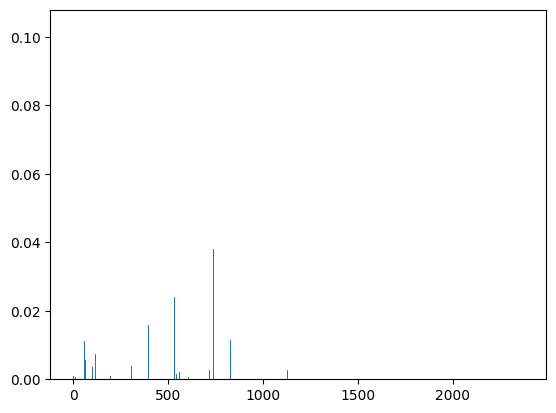

In [64]:
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [65]:
print(model.feature_importances_)

[0.00029317 0.00068103 0.00094974 ... 0.         0.         0.        ]


In [66]:
sorted_idx = np.argsort(model.feature_importances_)[::-1]

In [67]:
for index in sorted_idx:
    print([train.columns[index], model.feature_importances_[index]])

['feature_unpurified_tutelary_exultation', np.float32(0.10275566)]
['feature_flamier_sluttish_shrieve', np.float32(0.09481919)]
['feature_quakiest_stereospecific_ribaldry', np.float32(0.083817504)]
['feature_plummier_urethroscopic_tachyon', np.float32(0.08068201)]
['feature_spermatozoic_unhappy_calumet', np.float32(0.04188382)]
['feature_australian_unstigmatized_pasch', np.float32(0.037916694)]
['feature_gelded_hexagonal_microphotography', np.float32(0.037460666)]
['feature_felt_retrocessive_variation', np.float32(0.031529088)]
['feature_isentropic_military_latimer', np.float32(0.030042915)]
['feature_alleviated_wrinkled_glycosuria', np.float32(0.027680261)]
['feature_sunlit_untrampled_entoblast', np.float32(0.027384212)]
['feature_clubby_inherent_tolu', np.float32(0.02679771)]
['feature_albitic_unseizable_reshipment', np.float32(0.026201691)]
['feature_neutralism_swordlike_empiricist', np.float32(0.023934446)]
['feature_omissive_unpillowed_exuberance', np.float32(0.022515392)]
['featu

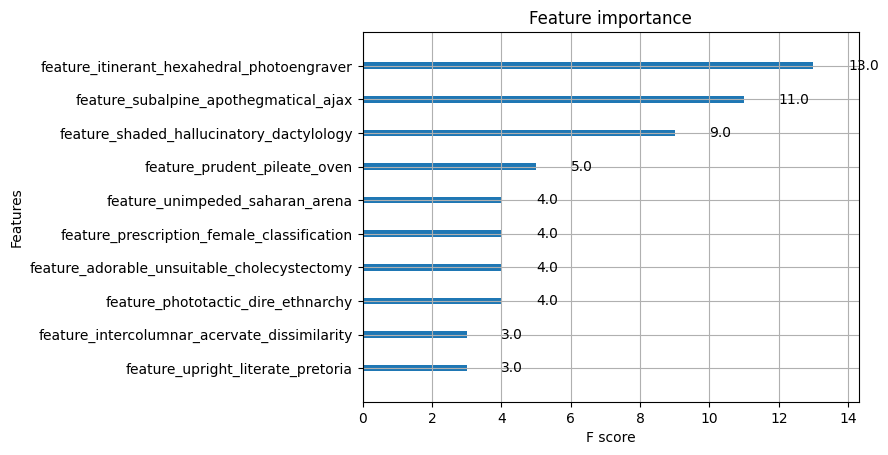

In [74]:
plot_importance(model, max_num_features = 10)
pyplot.show()

['feature_unpurified_tutelary_exultation', np.float32(0.10275566)]
['feature_flamier_sluttish_shrieve', np.float32(0.09481919)]
['feature_quakiest_stereospecific_ribaldry', np.float32(0.083817504)]
['feature_plummier_urethroscopic_tachyon', np.float32(0.08068201)]
['feature_spermatozoic_unhappy_calumet', np.float32(0.04188382)]
['feature_australian_unstigmatized_pasch', np.float32(0.037916694)]
['feature_gelded_hexagonal_microphotography', np.float32(0.037460666)]
['feature_felt_retrocessive_variation', np.float32(0.031529088)]
['feature_isentropic_military_latimer', np.float32(0.030042915)]
['feature_alleviated_wrinkled_glycosuria', np.float32(0.027680261)]
['feature_sunlit_untrampled_entoblast', np.float32(0.027384212)]
['feature_clubby_inherent_tolu', np.float32(0.02679771)]
['feature_albitic_unseizable_reshipment', np.float32(0.026201691)]
['feature_neutralism_swordlike_empiricist', np.float32(0.023934446)]
['feature_omissive_unpillowed_exuberance', np.float32(0.022515392)]
['featu

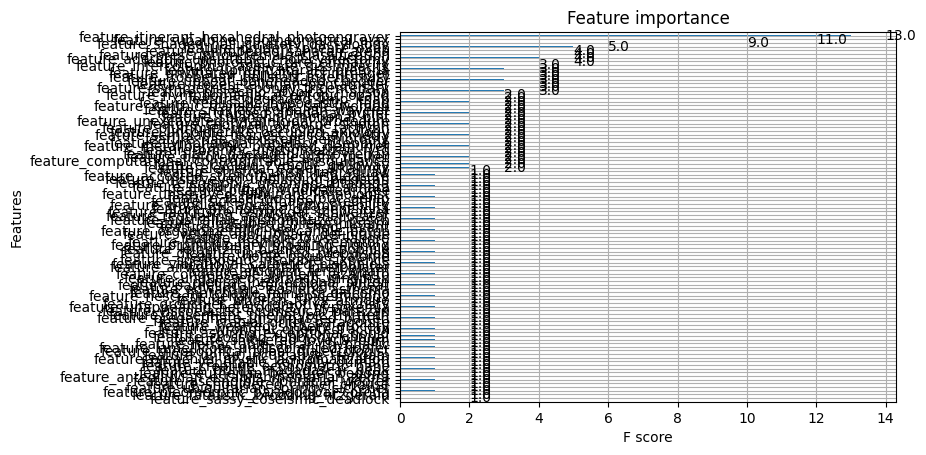

In [71]:
sorted_idx = np.argsort(model.feature_importances_)[::-1]
for index in sorted_idx:
    print([train.columns[index], model.feature_importances_[index]])
plot_importance(model, max_num_features = 100)
pyplot.show()

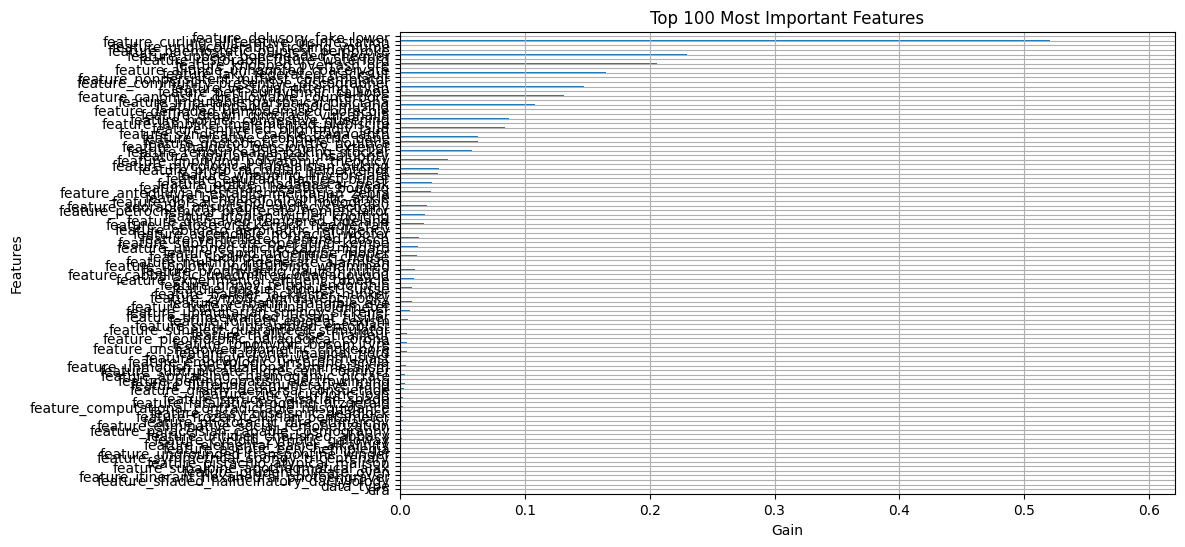

In [80]:
top_n = 100
feature_names = train.columns.tolist() 
fig, ax = plt.subplots(figsize=(10, 6))
xgb.plot_importance(model, ax=ax, importance_type='gain',
                    max_num_features=top_n, show_values=False)
plt.yticks(range(top_n), feature_names[:top_n])
plt.xlabel('Gain')
plt.title(f'Top {top_n} Most Important Features')
plt.show()

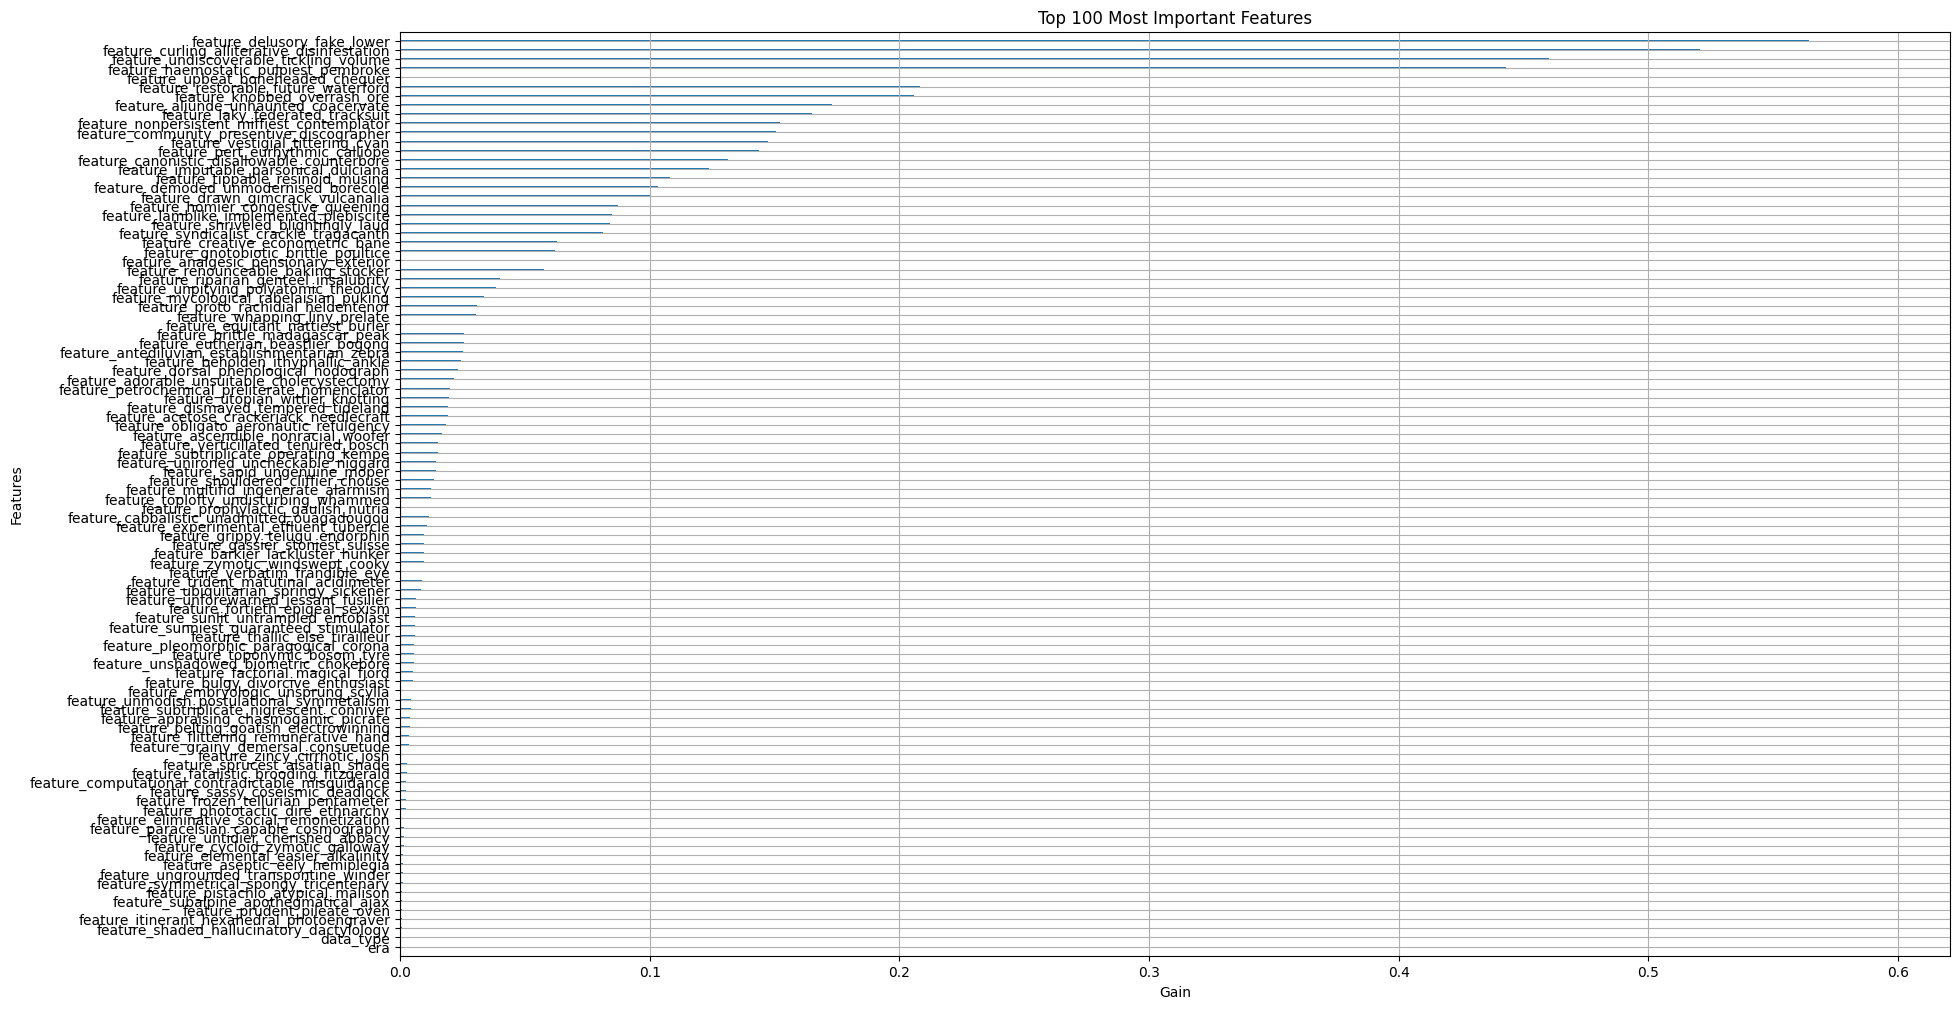

In [81]:
top_n = 100
feature_names = train.columns.tolist() 
fig, ax = plt.subplots(figsize=(20, 12))
xgb.plot_importance(model, ax=ax, importance_type='gain',
                    max_num_features=top_n, show_values=False)
plt.yticks(range(top_n), feature_names[:top_n])
plt.xlabel('Gain')
plt.title(f'Top {top_n} Most Important Features')
plt.show()

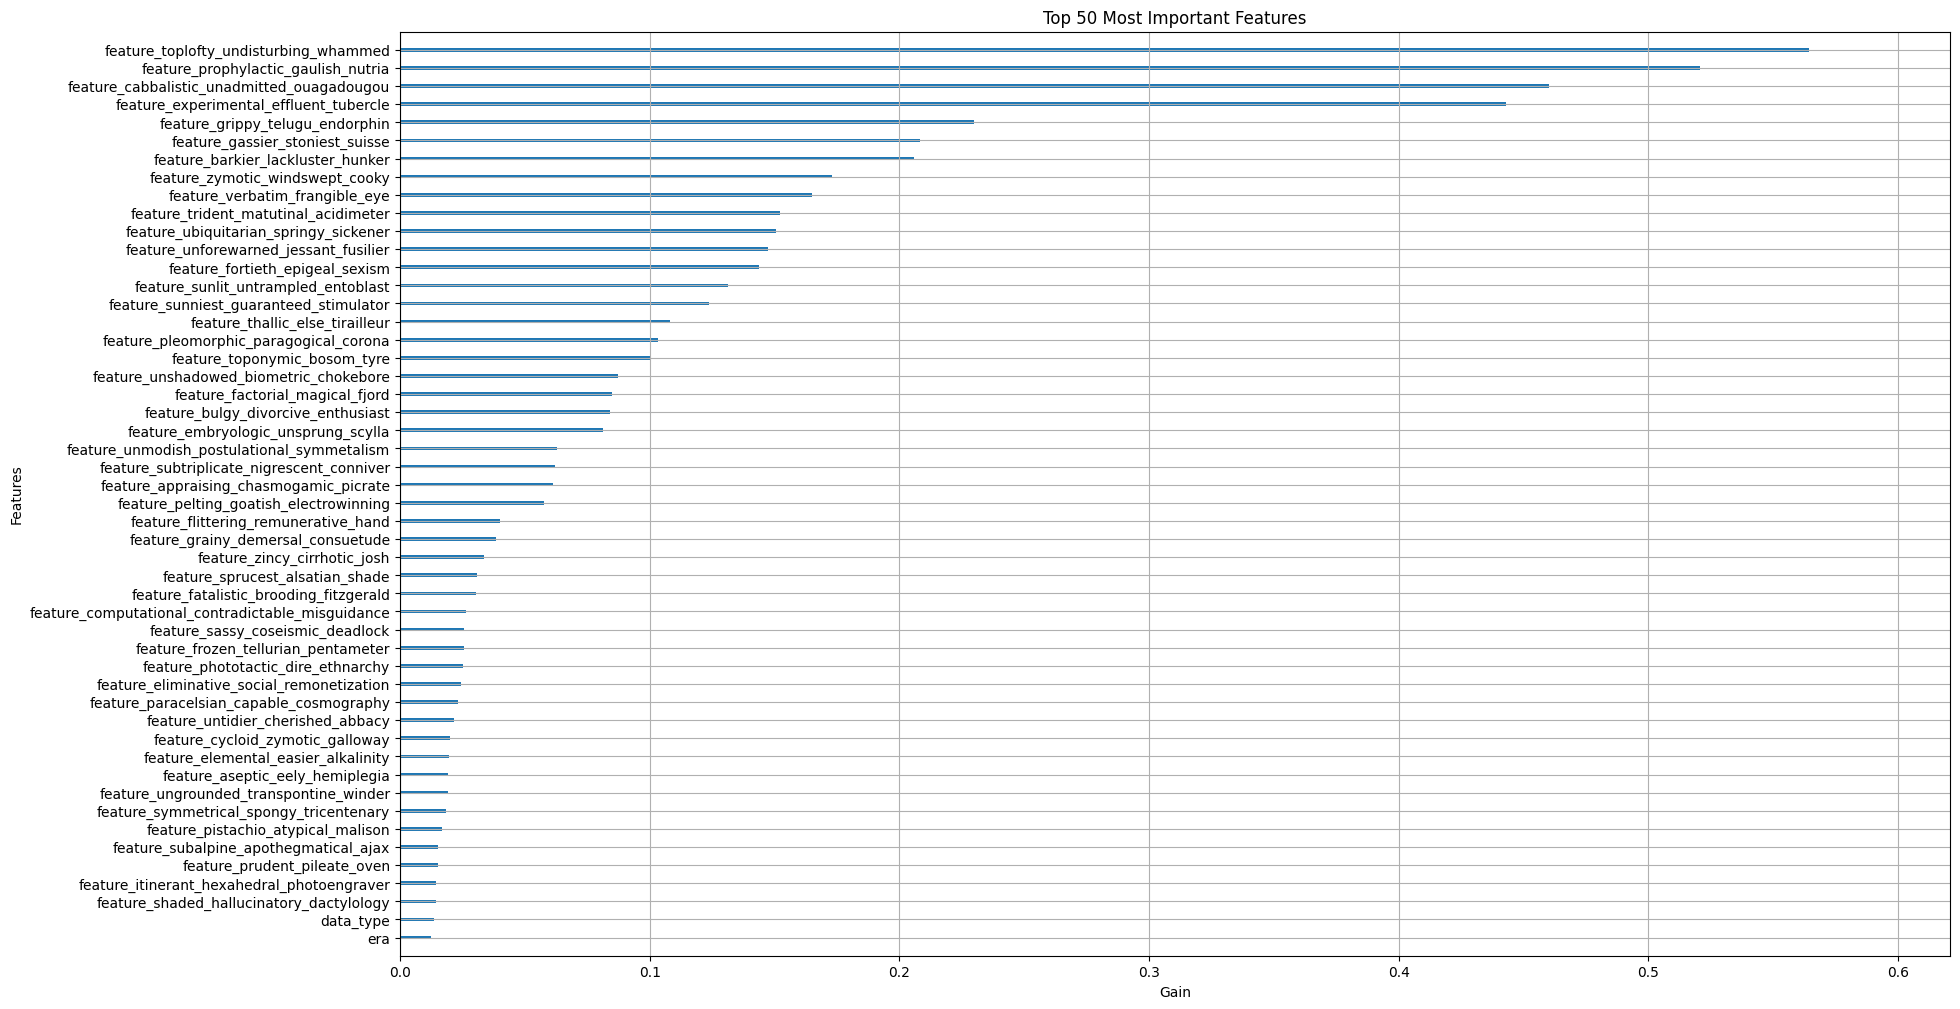

In [82]:
top_n = 50
feature_names = train.columns.tolist() 
fig, ax = plt.subplots(figsize=(20, 12))
xgb.plot_importance(model, ax=ax, importance_type='gain',
                    max_num_features=top_n, show_values=False)
plt.yticks(range(top_n), feature_names[:top_n])
plt.xlabel('Gain')
plt.title(f'Top {top_n} Most Important Features')
plt.show()

In [140]:
def kinetic(x):
    probs=np.unique(x,return_counts=True)[1]/len(x)
    kinetic=np.sum(probs**2)
    return kinetic

In [141]:
X["KINETIC_FEAT"]=X.apply(kinetic,axis=1)

In [142]:
X["max_FEAT"]=X[good_cols].apply(np.max,axis=1)

In [143]:
X["mean_FEAT"]=X[good_cols].apply(np.mean,axis=1)

In [144]:
train.head()

,era,data_type,feature_shaded_hallucinatory_dactylology,feature_itinerant_hexahedral_photoengraver,feature_prudent_pileate_oven,feature_subalpine_apothegmatical_ajax,feature_pistachio_atypical_malison,feature_symmetrical_spongy_tricentenary,feature_ungrounded_transpontine_winder,feature_aseptic_eely_hemiplegia,...,target_teager2b_20,target_teager2b_60,target_tyler_20,target_tyler_60,target_victor_20,target_victor_60,target_waldo_20,target_waldo_60,target_xerxes_20,target_xerxes_60
0,1,train,3,4,0,3,3,1,1,0,...,0.50,0.50,0.25,0.25,0.25,0.25,0.25,0.00,0.25,0.00
1,1,train,4,2,4,4,0,0,4,4,...,0.50,0.50,0.25,0.25,0.25,0.00,0.25,0.25,0.25,0.25
2,1,train,2,4,0,3,0,3,2,4,...,1.00,1.00,1.00,0.75,0.75,0.75,0.75,1.00,0.75,0.75
3,1,train,2,1,3,0,3,0,3,3,...,0.25,0.25,0.25,0.25,0.50,0.25,0.25,0.25,0.25,0.25
4,1,train,4,1,4,1,0,4,0,4,...,0.50,0.50,0.25,0.50,0.25,0.50,0.25,0.50,0.25,0.50


In [95]:
train.columns

Index(['era', 'data_type', 'feature_shaded_hallucinatory_dactylology',
       'feature_itinerant_hexahedral_photoengraver',
       'feature_prudent_pileate_oven', 'feature_subalpine_apothegmatical_ajax',
       'feature_pistachio_atypical_malison',
       'feature_symmetrical_spongy_tricentenary',
       'feature_ungrounded_transpontine_winder',
       'feature_aseptic_eely_hemiplegia',
       ...
       'target_teager2b_20', 'target_teager2b_60', 'target_tyler_20',
       'target_tyler_60', 'target_victor_20', 'target_victor_60',
       'target_waldo_20', 'target_waldo_60', 'target_xerxes_20',
       'target_xerxes_60'],
      dtype='object', length=2415)

In [103]:
print(X.columns)

Index(['feature_shaded_hallucinatory_dactylology',
       'feature_itinerant_hexahedral_photoengraver',
       'feature_prudent_pileate_oven', 'feature_subalpine_apothegmatical_ajax',
       'feature_pistachio_atypical_malison',
       'feature_symmetrical_spongy_tricentenary',
       'feature_ungrounded_transpontine_winder',
       'feature_aseptic_eely_hemiplegia',
       'feature_elemental_easier_alkalinity',
       'feature_cycloid_zymotic_galloway',
       ...
       'target_teager2b_20', 'target_teager2b_60', 'target_tyler_20',
       'target_tyler_60', 'target_victor_20', 'target_victor_60',
       'target_waldo_20', 'target_waldo_60', 'target_xerxes_20',
       'target_xerxes_60'],
      dtype='object', length=2412)


In [126]:
sorted_idx = np.argsort(model.feature_importances_)[::-1]

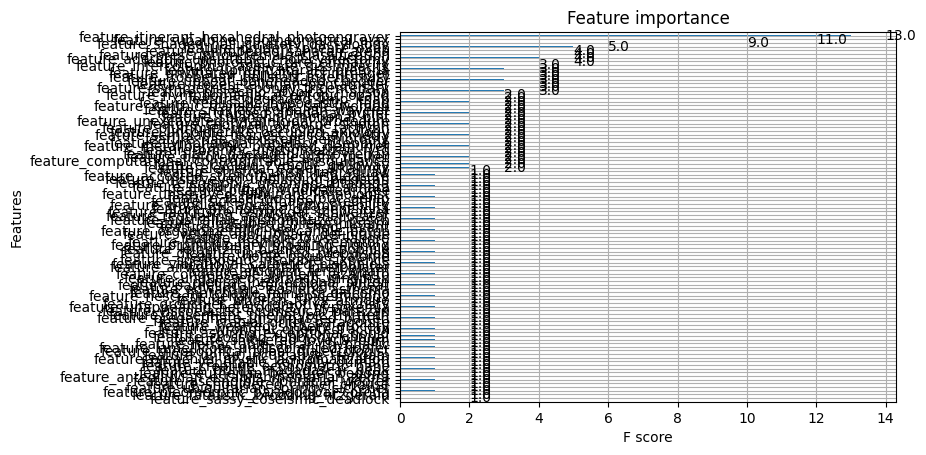

In [127]:
plot_importance(model, max_num_features = 100)
pyplot.show()

In [125]:

good_cols=[col for col in X.columns if not col.startswith("target")]
X=X[good_cols]

In [128]:
def kinetic(x):
    probs=np.unique(x,return_counts=True)[1]/len(x)
    kinetic=np.sum(probs**2)
    return kinetic

In [129]:
X["KINETIC_FEAT"]=X.apply(kinetic,axis=1)

In [130]:
X["max_FEAT"]=X[good_cols].apply(np.max,axis=1)

In [131]:
X["mean_FEAT"]=X[good_cols].apply(np.mean,axis=1)

In [132]:
train.head()

,era,data_type,feature_shaded_hallucinatory_dactylology,feature_itinerant_hexahedral_photoengraver,feature_prudent_pileate_oven,feature_subalpine_apothegmatical_ajax,feature_pistachio_atypical_malison,feature_symmetrical_spongy_tricentenary,feature_ungrounded_transpontine_winder,feature_aseptic_eely_hemiplegia,...,target_teager2b_20,target_teager2b_60,target_tyler_20,target_tyler_60,target_victor_20,target_victor_60,target_waldo_20,target_waldo_60,target_xerxes_20,target_xerxes_60
0,1,train,3,4,0,3,3,1,1,0,...,0.50,0.50,0.25,0.25,0.25,0.25,0.25,0.00,0.25,0.00
1,1,train,4,2,4,4,0,0,4,4,...,0.50,0.50,0.25,0.25,0.25,0.00,0.25,0.25,0.25,0.25
2,1,train,2,4,0,3,0,3,2,4,...,1.00,1.00,1.00,0.75,0.75,0.75,0.75,1.00,0.75,0.75
3,1,train,2,1,3,0,3,0,3,3,...,0.25,0.25,0.25,0.25,0.50,0.25,0.25,0.25,0.25,0.25
4,1,train,4,1,4,1,0,4,0,4,...,0.50,0.50,0.25,0.50,0.25,0.50,0.25,0.50,0.25,0.50


In [124]:
train.columns

Index(['era', 'data_type', 'feature_shaded_hallucinatory_dactylology',
       'feature_itinerant_hexahedral_photoengraver',
       'feature_prudent_pileate_oven', 'feature_subalpine_apothegmatical_ajax',
       'feature_pistachio_atypical_malison',
       'feature_symmetrical_spongy_tricentenary',
       'feature_ungrounded_transpontine_winder',
       'feature_aseptic_eely_hemiplegia',
       ...
       'target_teager2b_20', 'target_teager2b_60', 'target_tyler_20',
       'target_tyler_60', 'target_victor_20', 'target_victor_60',
       'target_waldo_20', 'target_waldo_60', 'target_xerxes_20',
       'target_xerxes_60'],
      dtype='object', length=2415)

In [145]:
def kinetic(x):
    probs=np.unique(x,return_counts=True)[1]/len(x)
    kinetic=np.sum(probs**2)
    return kinetic

In [146]:
def add_feature_engineering(X):
   
    good_cols = [col for col in X.columns if not col.startswith("target")]
    X = X[good_cols].copy()
    X["KINETIC_FEAT"] = X.apply(kinetic, axis=1)
    X["max_FEAT"] = X[good_cols].apply(np.max, axis=1)
    X["mean_FEAT"] = X[good_cols].apply(np.mean, axis=1)
    return X

In [147]:
train.head()

,era,data_type,feature_shaded_hallucinatory_dactylology,feature_itinerant_hexahedral_photoengraver,feature_prudent_pileate_oven,feature_subalpine_apothegmatical_ajax,feature_pistachio_atypical_malison,feature_symmetrical_spongy_tricentenary,feature_ungrounded_transpontine_winder,feature_aseptic_eely_hemiplegia,...,target_teager2b_20,target_teager2b_60,target_tyler_20,target_tyler_60,target_victor_20,target_victor_60,target_waldo_20,target_waldo_60,target_xerxes_20,target_xerxes_60
0,1,train,3,4,0,3,3,1,1,0,...,0.50,0.50,0.25,0.25,0.25,0.25,0.25,0.00,0.25,0.00
1,1,train,4,2,4,4,0,0,4,4,...,0.50,0.50,0.25,0.25,0.25,0.00,0.25,0.25,0.25,0.25
2,1,train,2,4,0,3,0,3,2,4,...,1.00,1.00,1.00,0.75,0.75,0.75,0.75,1.00,0.75,0.75
3,1,train,2,1,3,0,3,0,3,3,...,0.25,0.25,0.25,0.25,0.50,0.25,0.25,0.25,0.25,0.25
4,1,train,4,1,4,1,0,4,0,4,...,0.50,0.50,0.25,0.50,0.25,0.50,0.25,0.50,0.25,0.50


In [150]:
print(X)

    feature_shaded_hallucinatory_dactylology  \
0                                          3   
1                                          4   
2                                          2   
3                                          2   
4                                          4   
..                                       ...   
95                                         0   
96                                         2   
97                                         3   
98                                         2   
99                                         3   

    feature_itinerant_hexahedral_photoengraver  feature_prudent_pileate_oven  \
0                                            4                             0   
1                                            2                             4   
2                                            4                             0   
3                                            1                             3   
4                      

In [152]:
train.columns

Index(['era', 'data_type', 'feature_shaded_hallucinatory_dactylology',
       'feature_itinerant_hexahedral_photoengraver',
       'feature_prudent_pileate_oven', 'feature_subalpine_apothegmatical_ajax',
       'feature_pistachio_atypical_malison',
       'feature_symmetrical_spongy_tricentenary',
       'feature_ungrounded_transpontine_winder',
       'feature_aseptic_eely_hemiplegia',
       ...
       'target_teager2b_20', 'target_teager2b_60', 'target_tyler_20',
       'target_tyler_60', 'target_victor_20', 'target_victor_60',
       'target_waldo_20', 'target_waldo_60', 'target_xerxes_20',
       'target_xerxes_60'],
      dtype='object', length=2415)

In [154]:
def kinetic(x):
    probs=np.unique(x,return_counts=True)[1]/len(x)
    kinetic=np.sum(probs**2)
    return kinetic

In [159]:
train["KINETIC_FEAT"]=train.apply(kinetic,axis=1)

In [160]:
train["max_FEAT"]=train[good_cols].apply(np.max,axis=1)

In [161]:
train["mean_FEAT"]=train[good_cols].apply(np.mean,axis=1)

In [ ]:
train.head()

In [163]:
train.columns

Index(['feature_shaded_hallucinatory_dactylology',
       'feature_itinerant_hexahedral_photoengraver',
       'feature_prudent_pileate_oven', 'feature_subalpine_apothegmatical_ajax',
       'feature_pistachio_atypical_malison',
       'feature_symmetrical_spongy_tricentenary',
       'feature_ungrounded_transpontine_winder',
       'feature_aseptic_eely_hemiplegia',
       'feature_elemental_easier_alkalinity',
       'feature_cycloid_zymotic_galloway',
       ...
       'target_tyler_60', 'target_victor_20', 'target_victor_60',
       'target_waldo_20', 'target_waldo_60', 'target_xerxes_20',
       'target_xerxes_60', 'KINETIC_FEAT', 'max_FEAT', 'mean_FEAT'],
      dtype='object', length=2416)